# Titanic (Predict whether someone will survive titanic or not)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set();
from sklearn import tree   #importing model
from sklearn.metrics import accuracy_score   #for finding accuracy

In [2]:
#Function to convert Sex column
def gender(value):
    return int(value=='male')

In [3]:
#function to calculate age
def calc_age(val,df):
    age=val[0]
    clas=val[1]
    sex=val[2]
    #print(val)
    if pd.isnull(age):
        return ( df[(df.Pclass==clas) & (df.Sex==sex)]['Age'].mean())
    else:
        return age;

In [4]:
#function to handle embarked
def emb(value,embarked):
    return embarked.index(value)+1

In [5]:
#function to clean DataFrame
def filterdata(val):
    
    #Removing extra columns
    li=['Name','Ticket','Cabin','PassengerId']
    for i in li:
        del data[i]
    
    #filtering Sex
    data['Sex']=data['Sex'].apply(gender)
    
    #cleaning embarked
    
    print(embarked)
    data['Embarked']=data['Embarked'].apply(emb,embarked=embarked)
    
    #cleaning age
    d1=data[['Age','Pclass','Sex']]
    data['Age']=d1.apply(calc_age,axis=1,df=data)
    
    #Filling null values with their mean value
    data.Fare.fillna(data['Fare'].mean(),inplace=True)
    return data

In [6]:
#Reading Train data
data=pd.read_csv('train.csv')
#Finding embarked for future use
embarked=list(pd.unique(data['Embarked']))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#Filtering Train Data
train=filterdata(data)
train


['S', 'C', 'Q', nan]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.00,1,0,7.2500,1
1,1,1,0,38.00,1,0,71.2833,2
2,1,3,0,26.00,0,0,7.9250,1
3,1,1,0,35.00,1,0,53.1000,1
4,0,3,1,35.00,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,1
887,1,1,0,19.00,0,0,30.0000,1
888,0,3,0,21.75,1,2,23.4500,1
889,1,1,1,26.00,0,0,30.0000,2


In [8]:
#Reading Test data
data=pd.read_csv('test.csv')
data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
#Filtering Test data
test=filterdata(data)
test

['S', 'C', 'Q', nan]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.500000,0,0,7.8292,3
1,3,0,47.000000,1,0,7.0000,1
2,2,1,62.000000,0,0,9.6875,3
3,3,1,27.000000,0,0,8.6625,1
4,3,0,22.000000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,24.525104,0,0,8.0500,1
414,1,0,39.000000,0,0,108.9000,2
415,3,1,38.500000,0,0,7.2500,1
416,3,1,24.525104,0,0,8.0500,1


In [10]:
#Making training input(trainX) and output(trainY) DataFrame out of training data
trainX=train.iloc[:]
del trainX['Survived']
trainY=train['Survived']

In [11]:
#Reading output file
d3=pd.read_csv('gender_submission.csv')
d3=d3['Survived']
d3

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Analysis

In [12]:
def bar_graph(feature):
    alive=train[train["Survived"]==1][feature].value_counts();
    dead=train[train["Survived"]==0][feature].value_counts();
   # print(type(dead));
    df=pd.DataFrame([alive,dead]);
    df.index=["alive","dead"];
    df.plot(kind='bar',stacked=True,figsize=(10,5));
    print(df); 

         0    1
alive  233  109
dead    81  468


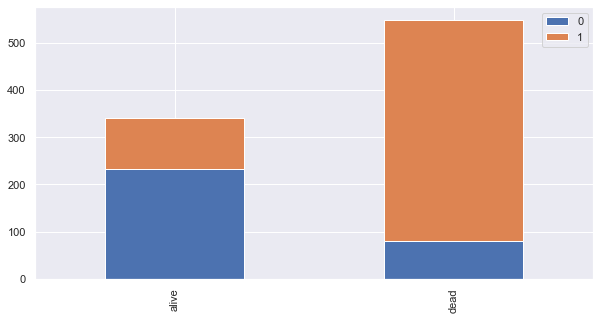

In [13]:
bar_graph("Sex");

         1   2    3
alive  136  87  119
dead    80  97  372


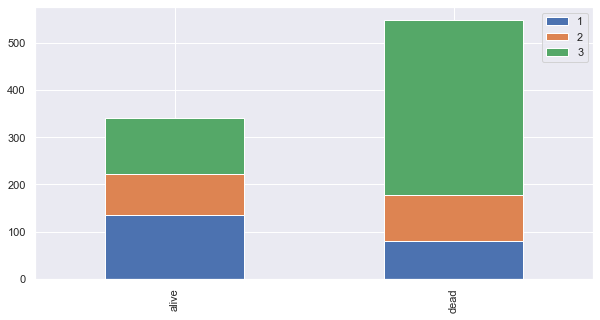

In [14]:
bar_graph("Pclass")

           0      1     2     3     4    5    8
alive  210.0  112.0  13.0   4.0   3.0  NaN  NaN
dead   398.0   97.0  15.0  12.0  15.0  5.0  7.0


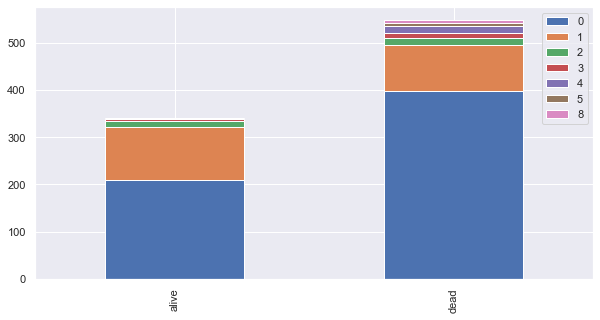

In [15]:
bar_graph("SibSp");

           0     1     2    3    4    5    6
alive  233.0  65.0  40.0  3.0  NaN  1.0  NaN
dead   445.0  53.0  40.0  2.0  4.0  4.0  1.0


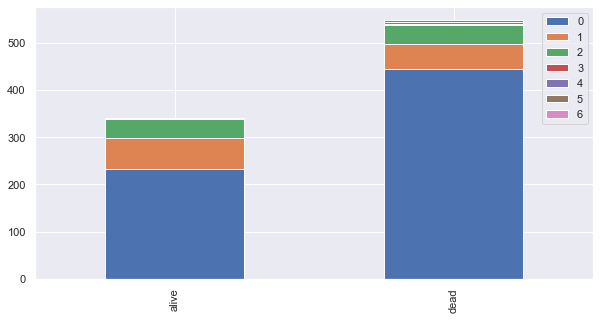

In [16]:
bar_graph("Parch");

           1     2     3    4
alive  217.0  93.0  30.0  2.0
dead   427.0  75.0  47.0  NaN


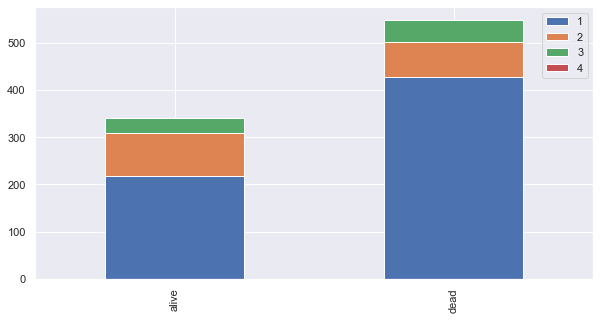

In [17]:
bar_graph("Embarked");

In [18]:
#Merging Test and train data
data=pd.concat([test,d3],axis=1)
data=pd.concat([data,train],sort=True,ignore_index=True)

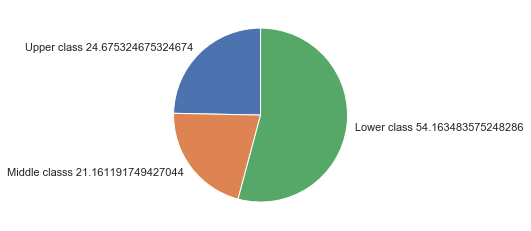

In [19]:
#pie chart of Ticket class
lbl=['Upper class','Middle classs','Lower class']
clas=data['Pclass'].value_counts()
clas=clas.sort_index()
tot=clas.sum()

for i in range(len(lbl)):
    lbl[i]+=" "+str((clas[i+1]/tot)*100)
plt.pie(clas,labels=lbl,startangle=90)
plt.show()

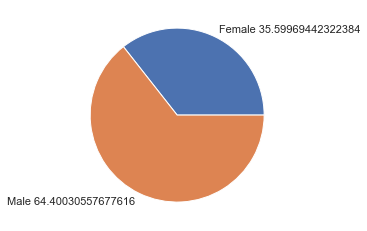

In [20]:
#pie chart of male and female
lbl=['Female','Male']
sur=data['Sex'].value_counts().sort_index()
tot=sur.sum()

for i in range(2):
    lbl[i]+=" "+str(sur[i]/tot*100)
plt.pie(sur,labels=lbl)
plt.show()

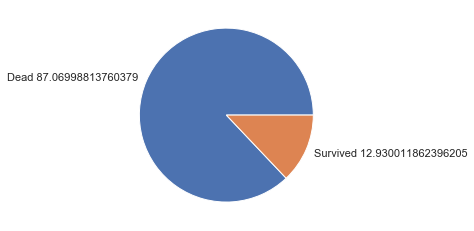

In [21]:
#Pie chart of Male survived
lbl=['Dead','Survived']
sur=data[data['Sex']==1]['Survived'].value_counts()
tot=sur.sum()
for i in range(2):
    lbl[i]+=" "+str(sur[i]/tot*100)
plt.pie(sur,labels=lbl)
plt.show()

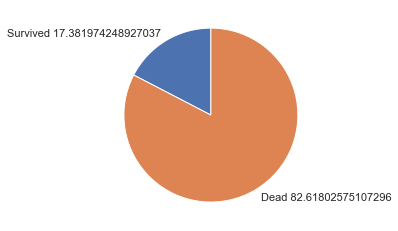

In [22]:
#Pie chart of Female survived
lbl=['Survived','Dead']
sur=data[data['Sex']==0]['Survived'].value_counts().sort_index()
tot=sur.sum()

for i in range(2):
    lbl[i]+=" "+str(sur[i]/tot*100)
plt.pie(sur,labels=lbl,startangle=90)
plt.show()

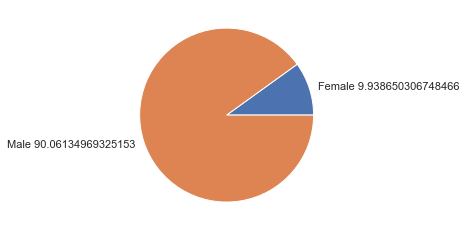

In [23]:
#pie chart of Dead people
lbl=['Female','Male']
sur=data[data['Survived']==0]['Sex'].value_counts().sort_index()
tot=sur.sum()
for i in range(2):
    lbl[i]+=" "+str(sur[i]/tot*100)
plt.pie(sur,labels=lbl)
plt.show()

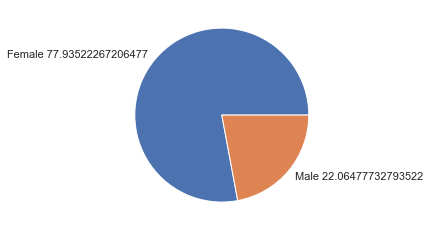

In [24]:
#pie chart of Survived people
lbl=['Female','Male']
sur=data[data['Survived']==1]['Sex'].value_counts().sort_index()
tot=sur.sum()
for i in range(2):
    lbl[i]+=" "+str(sur[i]/tot*100)
plt.pie(sur,labels=lbl)
plt.show()

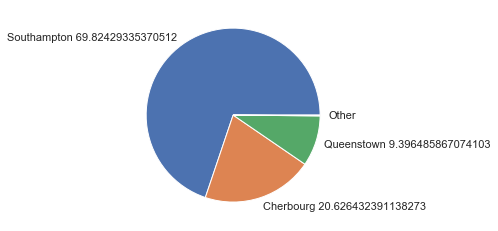

In [25]:
#pie chart of Entering port
lbl=['Southampton','Cherbourg','Queenstown','Other']
sur=data['Embarked'].value_counts().sort_index()
tot=sur.sum()
for i in range(3):
    lbl[i]+=" "+str(sur[i+1]/tot*100)
plt.pie(sur,labels=lbl)
plt.show()

# Prediction Starts

In [26]:
#Making model
clf=tree.DecisionTreeClassifier()

#Training data
clf=clf.fit(trainX,trainY)

#testing data
pred=clf.predict(test)

#Finding accuracy
acc=accuracy_score(pred,d3)
print(acc)

0.7799043062200957


# Predicting value

In [27]:
pclass=int(input("Enter Class(1:Upper, 2:Middle, 3:Lower):"))
sex=int(input("Enter Gender(0:Female, 1:Male):"))
age=int(input("Enter Age:"))
sib=int(input("Enter number of Siblings:"))
parent=int(input("Enter number of parent/children:"))
fare=int(input("Enter fare:"))
emb=int(input("Enter entering port(0: Southampton, 1: Cherbourg, 2: Queenstown ):"))
arr=np.array([pclass,sex,age,sib,parent,fare,emb])
arr=arr.reshape(1,-1)
pred=clf.predict(arr)
print("Survived") if(pred==1) else print("Dead")

Enter Class(1:Upper, 2:Middle, 3:Lower):1
Enter Gender(0:Female, 1:Male):1
Enter Age:56
Enter number of Siblings:3
Enter number of parent/children:2
Enter fare:23
Enter entering port(0: Southampton, 1: Cherbourg, 2: Queenstown ):1
Survived
